In [2]:
from typing import TypedDict, Annotated
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq
from langchain_core.messages import AIMessage, HumanMessage

In [3]:
groq_api = "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"

llm = ChatGroq(model="llama-3.1-8b-instant", api_key=groq_api)


In [4]:

class BasicChatState(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: BasicChatState):
    return {
        "messages": [llm.invoke(state["messages"])]
    }


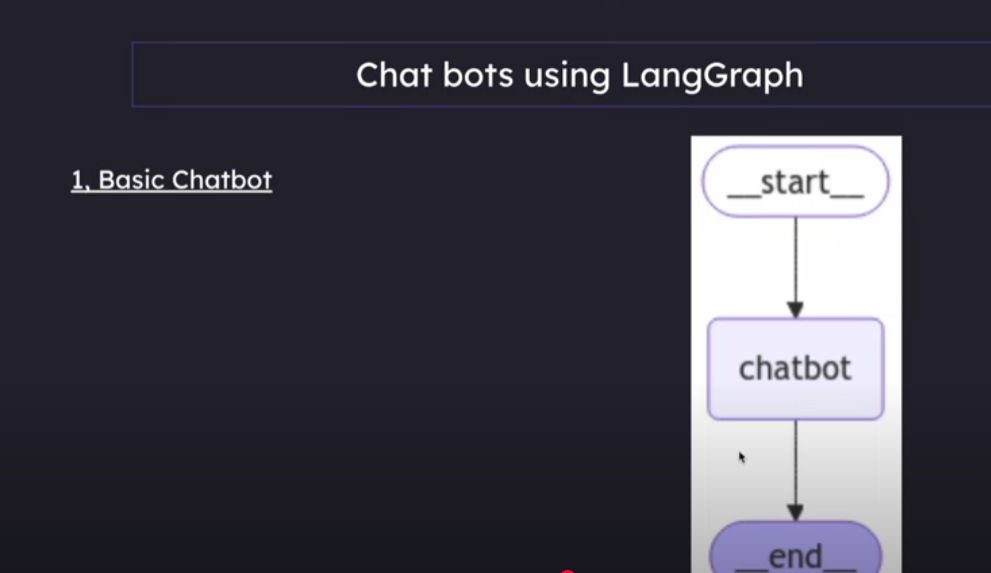

In [5]:
graph = StateGraph(BasicChatState)

graph.add_node("chatbot", chatbot)
graph.set_entry_point("chatbot")
graph.add_edge("chatbot", END)

app = graph.compile()

In [6]:

while True: 
    user_input = input("User: ")
    if(user_input in ["exit", "end"]):
        break
    else: 
        result = app.invoke({
            "messages": [HumanMessage(content=user_input)]
        })

        print(result)

{'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='303ed07a-7afc-4b04-96d8-deaa882d00cd'), AIMessage(content='It seems like you forgot to ask a question. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 35, 'total_tokens': 53, 'completion_time': 0.026236858, 'prompt_time': 0.001696791, 'queue_time': 0.053475799, 'total_time': 0.027933649}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--1809d27c-a231-47c9-8376-946a61cda0fd-0', usage_metadata={'input_tokens': 35, 'output_tokens': 18, 'total_tokens': 53})]}
{'messages': [HumanMessage(content='hi im vinith', additional_kwargs={}, response_metadata={}, id='4a1ab140-b581-44dc-b783-943a0c63c4e7'), AIMessage(content="Hello Vinith, it's nice to meet you. Is there anything I can help you with or would you like to chat?", additional_kwargs={}, respons